12. Perform the customer segmentation using K means clustering algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("wholesale.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [19]:
from sklearn.cluster import KMeans
sse = []
for cluster in range(1,20):
    km = KMeans(n_init = 2, n_clusters = cluster, init='k-means++')
    km.fit(scaled_data)
    sse.append(km.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':sse})
frame.head()

,Cluster,SSE
0,1,3520.000000
1,2,2600.375648
2,3,2166.709376
3,4,1851.840872
4,5,1561.792335


Text(0, 0.5, 'Inertia')

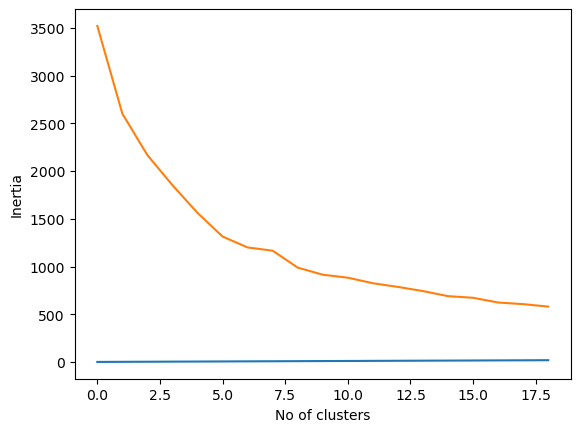

In [20]:
import matplotlib.pyplot as plt
plt.plot(frame)
plt.xlabel('No of clusters')
plt.ylabel('Inertia')

In [21]:
kmeans = KMeans(n_init = 2, n_clusters = 5, init='k-means++') 
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred 
frame['cluster'].value_counts()


1    241
2    130
0     57
4     10
3      2
Name: cluster, dtype: int64